In [308]:
import pandas as pd 
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt

In [302]:
import glob

path = r"D:\GES"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    fl = pd.read_csv(filename, index_col=None, header=0,skipfooter=1,engine='python')
    fl=fl[['Tarih','Saat','Güneş']]
    fl['GES']=str(filename.split('-')[1])
    li.append(fl)

#df = pd.concat(li, axis=0, ignore_index=True)


In [256]:
def tarih(data):
    y=data.split('.')[0]

    m=data.split('.')[1]

    d=data.split('.')[2]
    
    return y,m,d

In [303]:
#for i in range(len(all_files)):
for i in range(18):
    li[i]['Tarih']=li[i]['Tarih'].apply(lambda x : tarih(x))
    li[i]['gun']=li[i]['Tarih'].apply(lambda x: x[0])
    li[i]['ay']=li[i]['Tarih'].apply(lambda x: x[1])
    li[i]['yıl']=li[i]['Tarih'].apply(lambda x: x[2])
    li[i]['Güneş']=li[i]['Güneş'].apply(lambda x: x.replace(',','.')).apply(lambda x: float(x))
    li[i]=li[i].drop(columns='Tarih') 
    li[i]=li[i][['yıl','ay','gun','Saat','Güneş','GES']]

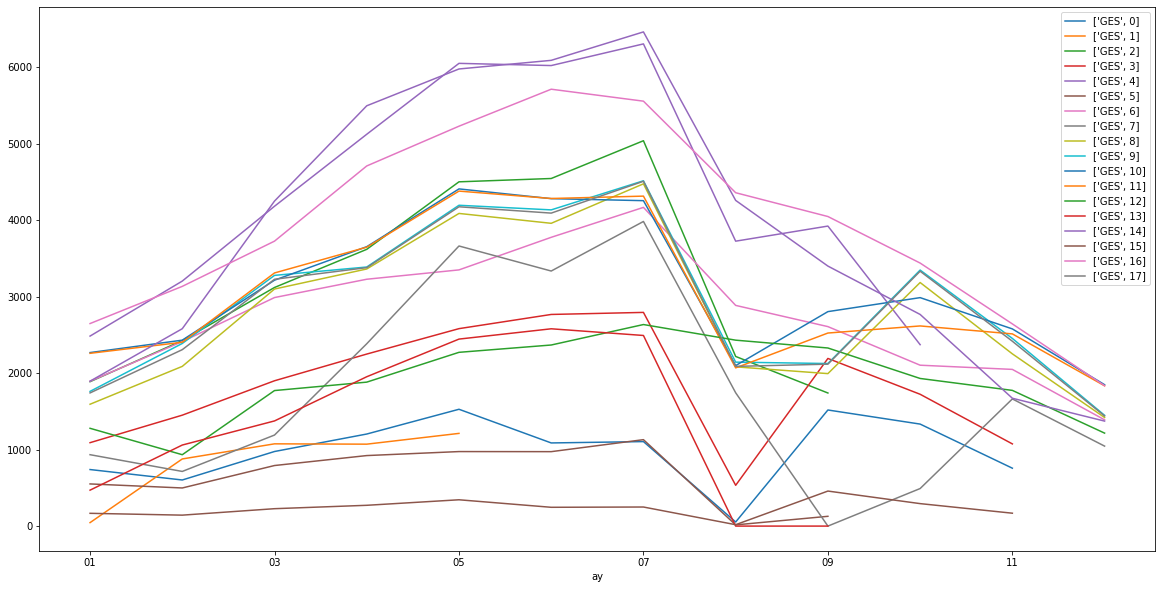

In [319]:
plt.figure(figsize=(20,10))
l=[]
for i in range(18):
    li[i].groupby(['ay']).sum()['Güneş'].plot()
    l.append(['GES',i])
plt.legend(l)